# InceptionV3

## Loading Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler

from keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Loading the dataset Images

In [7]:

TRAIN_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train"
VAL_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test"


TRAIN_COVID_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train/COVID19"
TRAIN_NORMAL_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train/NORMAL"
TRAIN_PNE_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA"


VAL_NORMAL_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test/NORMAL"
VAL_PNEU_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"
VAL_COVID_PATH = "/kaggle/input/chest-xray-covid19-pneumonia/Data/test/COVID19"

## Image Augmentation

In [10]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [11]:

train_generator = generator.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')

Found 5144 images belonging to 3 classes.


In [12]:

train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [13]:

validation_generator = generator.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')

Found 1288 images belonging to 3 classes.


## Applying InceptionV3 Model

In [15]:
epochs = 100
stepsperepoch=9
validationsteps=1
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=100)
mc = ModelCheckpoint("own.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)



In [16]:
model = InceptionV3(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [18]:


hist = model.fit_generator(
    train_generator,
    epochs=epochs,
    callbacks=[annealer,mc,es],
    steps_per_epoch=stepsperepoch,
    validation_data=validation_generator,
    validation_steps = validationsteps
)



Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 1.3464 - accuracy: 0.6632
Epoch 00001: val_loss improved from inf to 0.99729, saving model to own.h5
9/9 [==============================] - 16s 2s/step - loss: 1.3464 - accuracy: 0.6632 - val_loss: 0.9973 - val_accuracy: 0.7812
Epoch 2/100
9/9 [==============================] - ETA: 0s - loss: 0.8856 - accuracy: 0.6893
Epoch 00002: val_loss did not improve from 0.99729
9/9 [==============================] - 15s 2s/step - loss: 0.8856 - accuracy: 0.6893 - val_loss: 1.1645 - val_accuracy: 0.0625
Epoch 3/100
9/9 [==============================] - ETA: 0s - loss: 0.7227 - accuracy: 0.7361
Epoch 00003: val_loss did not improve from 0.99729
9/9 [==============================] - 14s 2s/step - loss: 0.7227 - accuracy: 0.7361 - val_loss: 1.3423 - val_accuracy: 0.5625
Epoch 4/100
9/9 [==============================] - ETA: 0s - loss: 0.5412 - accuracy: 0.7986
Epoch 00004: val_loss did not improve from 0.99729
9/9 [==============

Epoch 31/100
9/9 [==============================] - ETA: 0s - loss: 0.1908 - accuracy: 0.9201
Epoch 00031: val_loss did not improve from 0.83736
9/9 [==============================] - 12s 1s/step - loss: 0.1908 - accuracy: 0.9201 - val_loss: 2.2168 - val_accuracy: 0.5938
Epoch 32/100
9/9 [==============================] - ETA: 0s - loss: 0.1498 - accuracy: 0.9549
Epoch 00032: val_loss did not improve from 0.83736
9/9 [==============================] - 11s 1s/step - loss: 0.1498 - accuracy: 0.9549 - val_loss: 3.7165 - val_accuracy: 0.3750
Epoch 33/100
9/9 [==============================] - ETA: 0s - loss: 0.2014 - accuracy: 0.9375
Epoch 00033: val_loss did not improve from 0.83736
9/9 [==============================] - 11s 1s/step - loss: 0.2014 - accuracy: 0.9375 - val_loss: 2.9701 - val_accuracy: 0.6562
Epoch 34/100
9/9 [==============================] - ETA: 0s - loss: 0.1227 - accuracy: 0.9549
Epoch 00034: val_loss did not improve from 0.83736
9/9 [==============================] - 

Epoch 61/100
9/9 [==============================] - ETA: 0s - loss: 0.1066 - accuracy: 0.9549
Epoch 00061: val_loss did not improve from 0.24945
9/9 [==============================] - 11s 1s/step - loss: 0.1066 - accuracy: 0.9549 - val_loss: 0.5115 - val_accuracy: 0.8750
Epoch 62/100
9/9 [==============================] - ETA: 0s - loss: 0.1221 - accuracy: 0.9549
Epoch 00062: val_loss improved from 0.24945 to 0.11250, saving model to own.h5
9/9 [==============================] - 12s 1s/step - loss: 0.1221 - accuracy: 0.9549 - val_loss: 0.1125 - val_accuracy: 0.9688
Epoch 63/100
9/9 [==============================] - ETA: 0s - loss: 0.1507 - accuracy: 0.9479
Epoch 00063: val_loss improved from 0.11250 to 0.07285, saving model to own.h5
9/9 [==============================] - 12s 1s/step - loss: 0.1507 - accuracy: 0.9479 - val_loss: 0.0729 - val_accuracy: 0.9688
Epoch 64/100
9/9 [==============================] - ETA: 0s - loss: 0.1039 - accuracy: 0.9514
Epoch 00064: val_loss did not impr

Epoch 91/100
9/9 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.9757
Epoch 00091: val_loss did not improve from 0.03404
9/9 [==============================] - 11s 1s/step - loss: 0.0840 - accuracy: 0.9757 - val_loss: 0.1546 - val_accuracy: 0.9062
Epoch 92/100
9/9 [==============================] - ETA: 0s - loss: 0.0944 - accuracy: 0.9688
Epoch 00092: val_loss did not improve from 0.03404
9/9 [==============================] - 11s 1s/step - loss: 0.0944 - accuracy: 0.9688 - val_loss: 0.0573 - val_accuracy: 0.9688
Epoch 93/100
9/9 [==============================] - ETA: 0s - loss: 0.1046 - accuracy: 0.9688
Epoch 00093: val_loss did not improve from 0.03404
9/9 [==============================] - 11s 1s/step - loss: 0.1046 - accuracy: 0.9688 - val_loss: 0.0952 - val_accuracy: 0.9688
Epoch 94/100
9/9 [==============================] - ETA: 0s - loss: 0.1025 - accuracy: 0.9618
Epoch 00094: val_loss did not improve from 0.03404
9/9 [==============================] - 

## Finding Accuracy of the model

In [19]:
preds = model.evaluate(validation_generator)
print ("Validation Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

41/41 [==============================] - 37s 906ms/step - loss: 0.1411 - accuracy: 0.9503
Validation Loss = 0.14113329350948334
Validation Accuracy = 0.9503105878829956


## Accuracy : 95%

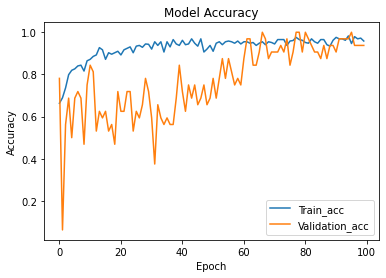

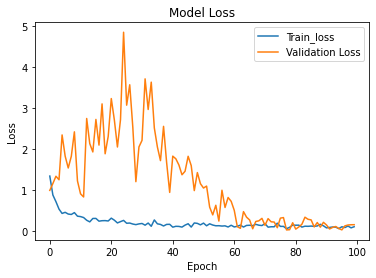

In [20]:


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

